In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import spacy
import re
import io
import operator

In [2]:
nlp=spacy.load('en_core_web_lg')

In [3]:
text="string with or without newline\n\n".rstrip('\n')
print(text)


string with or without newline


In [4]:
def boundary(docs):
    for token in docs:
        if token.text==' ;':
            docs[token.i+1].is_sent_start=True
        
    return docs
    

nlp.add_pipe(boundary,before='parser')

In [5]:
fd=io.open('doc.txt','r',encoding='utf-8')
doc=nlp((fd.read().replace('\n\n',' ')))

In [6]:
doc

Paragraph 1. Interpretation Definitions and Inconsistency.Capitalized terms not otherwise defined herein or elsewhere in the Agreement have the meanings specified pursuant to Paragraph 12, and all references in this Annex to Paragraphs are to Paragraphs of this Annex. In the event of any inconsistency between this Annex and the provisions of the Agreement, this Annex will prevail, and in the event of any inconsistency between Paragraph 13 and the other provisions of this Annex, Paragraph 13 will prevail. Obligee and Obligor. All references in this Annex to the "Obligee" will be to either party when acting as a borrower or a secured party and all corresponding references to the "Obligor" will be to the other party when acting as a lender or a pledgor. 
Paragraph 2. Security Transaction Loan. Each party, as the Obligor, hereby lends Lending Collateral to the other party, as the Obligee, as credit support for its Obligations, and grants to the Obligee right of Set-off as set forth in Para

In [7]:
for i,sent in enumerate(doc.sents):
    #print(i,'----> ',sent)
    print(sent[0])


Paragraph
Interpretation
Capitalized
In
Obligee
All
Paragraph
Security
Each
(
If
8
provided
Pledge
Each
Upon
will
Paragraph
Credit
Subject
13).Unless
Return
Subject
,
For
However
Unless
"
Credit
the
the
all
minus
the
Paragraph
Conditions
Conditions
Each
Transfer
Subject
Calculations
All
The
Substitutions
Unless
However
Paragraph
Dispute
If
the
*
utilizing
In
Following
The
Paragraph
Holding
Until
For
Care
Without
Except
Eligibility
General
Subject
Upon
The
Failure
If
Liability
The
Use
Unless
re
Pledging
For
Distributions
Distributions
Subject
Transfer
and/or
to
(
Interest
Unless
The
will
The
Paragraph
Events
that
Paragraph
Certain
If
an
Pledging
For
In
Each
Deficiencies
The
Final
When
Paragraph
Representations
Each
any
;
it
Pledging
Paragraph
Expenses
Except
Posted
The
Liquidation
All
Paragraph
Miscellaneous
An
This
Further
Promptly
Further
The
Good
Performance
Demands
All
Specifications
Anything
Governing
Notwithstanding
With
Paragraph
Definitions
As
"
Base
"
Cash
"
Credit
"
Custodian


In [8]:
with doc.retokenize() as retokenizer:
    for np in list(doc.noun_chunks):
        attrs = {
            "tag": np.root.tag_,
            "lemma": np.root.lemma_,
            "ent_type": np.root.ent_type_,
        }
        retokenizer.merge(np, attrs=attrs)

spans = []
for word in doc[:-1]:
    if word.is_punct or not word.nbor(1).is_punct:
        continue
    start = word.i
    end = word.i + 1
    while end < len(doc) and doc[end].is_punct:
        end += 1
    span = doc[start:end]
    spans.append((span, word.tag_, word.lemma_, word.ent_type_))
with doc.retokenize() as retokenizer:
    for span, tag, lemma, ent_type in spans:
        attrs = {"tag": tag, "lemma": lemma, "ent_type": ent_type}
        retokenizer.merge(span, attrs=attrs)

In [9]:
#for i,sent in enumerate(doc.sents):
#    print(i,'--->',sent)

In [10]:
list_pos = []
for i,sent in enumerate(doc.sents):
    pos=[(token.pos_,token.text)for token in sent]
    list_pos.append(pos)
print(list_pos)

[[('NOUN', 'Paragraph'), ('NUM', '1.')], [('PROPN', 'Interpretation'), ('PROPN', 'Definitions'), ('CCONJ', 'and'), ('PROPN', 'Inconsistency.')], [('NOUN', 'Capitalized terms'), ('ADV', 'not'), ('ADV', 'otherwise'), ('VERB', 'defined'), ('ADV', 'herein'), ('CCONJ', 'or'), ('ADV', 'elsewhere'), ('ADP', 'in'), ('PROPN', 'the Agreement'), ('VERB', 'have'), ('NOUN', 'the meanings'), ('VERB', 'specified'), ('ADJ', 'pursuant'), ('ADP', 'to'), ('PROPN', 'Paragraph'), ('NUM', '12,'), ('CCONJ', 'and'), ('NOUN', 'all references'), ('ADP', 'in'), ('PROPN', 'this Annex'), ('ADP', 'to'), ('NOUN', 'Paragraphs'), ('VERB', 'are'), ('ADP', 'to'), ('NOUN', 'Paragraphs'), ('ADP', 'of'), ('PROPN', 'this Annex.')], [('ADP', 'In'), ('NOUN', 'the event'), ('ADP', 'of'), ('NOUN', 'any inconsistency'), ('ADP', 'between'), ('PROPN', 'this Annex'), ('CCONJ', 'and'), ('NOUN', 'the provisions'), ('ADP', 'of'), ('PROPN', 'the Agreement,'), ('PROPN', 'this Annex'), ('VERB', 'will'), ('VERB', 'prevail,'), ('CCONJ', 'a

In [11]:
list_pos[1]

[('PROPN', 'Interpretation'),
 ('PROPN', 'Definitions'),
 ('CCONJ', 'and'),
 ('PROPN', 'Inconsistency.')]

In [12]:
def getNGrams(wordlist, n):
    ngrams = []
    for i in range(len(wordlist)-(n-1)):
        ngrams.append(wordlist[i:i+n])
    return ngrams

In [13]:
n_grammed=[]
for i in range(len(list_pos)):
    if not len(list_pos[i])<4:
        n_grammed.append(getNGrams(list_pos[i],4))
for i in range(len(n_grammed)):
    print(i+1, '-->' ,n_grammed[i])
    print('\n')
print(n_grammed)

1 --> [[('PROPN', 'Interpretation'), ('PROPN', 'Definitions'), ('CCONJ', 'and'), ('PROPN', 'Inconsistency.')]]


2 --> [[('NOUN', 'Capitalized terms'), ('ADV', 'not'), ('ADV', 'otherwise'), ('VERB', 'defined')], [('ADV', 'not'), ('ADV', 'otherwise'), ('VERB', 'defined'), ('ADV', 'herein')], [('ADV', 'otherwise'), ('VERB', 'defined'), ('ADV', 'herein'), ('CCONJ', 'or')], [('VERB', 'defined'), ('ADV', 'herein'), ('CCONJ', 'or'), ('ADV', 'elsewhere')], [('ADV', 'herein'), ('CCONJ', 'or'), ('ADV', 'elsewhere'), ('ADP', 'in')], [('CCONJ', 'or'), ('ADV', 'elsewhere'), ('ADP', 'in'), ('PROPN', 'the Agreement')], [('ADV', 'elsewhere'), ('ADP', 'in'), ('PROPN', 'the Agreement'), ('VERB', 'have')], [('ADP', 'in'), ('PROPN', 'the Agreement'), ('VERB', 'have'), ('NOUN', 'the meanings')], [('PROPN', 'the Agreement'), ('VERB', 'have'), ('NOUN', 'the meanings'), ('VERB', 'specified')], [('VERB', 'have'), ('NOUN', 'the meanings'), ('VERB', 'specified'), ('ADJ', 'pursuant')], [('NOUN', 'the meanings'),

In [14]:
counter = {}
for i in range(len(n_grammed)):
    for jj in n_grammed[i]:
        kk=tuple(jj)
        if kk in counter.keys():
            counter[kk] += 1
        else:
            counter[kk] = 1
sorted_counter = sorted(counter.items(), key=operator.itemgetter(1),reverse=True)
(sorted_counter)

[((('VERB', 'has'),
   ('NOUN', 'the meaning'),
   ('VERB', 'specified'),
   ('ADP', 'in')),
  11),
 ((('VERB', 'will'), ('VERB', 'be'), ('VERB', 'deemed'), ('PART', 'to')), 9),
 ((('ADV', 'otherwise'),
   ('VERB', 'specified'),
   ('ADP', 'in'),
   ('PROPN', 'Paragraph')),
  8),
 ((('ADJ', 'payable'),
   ('ADP', 'by'),
   ('PROPN', 'the Obligor'),
   ('ADP', 'with')),
  8),
 ((('ADP', 'by'),
   ('PROPN', 'the Obligor'),
   ('ADP', 'with'),
   ('NOUN', 'respect')),
  8),
 ((('PROPN', 'the Obligor'),
   ('ADP', 'with'),
   ('NOUN', 'respect'),
   ('ADP', 'to')),
  8),
 ((('ADP', 'with'), ('NOUN', 'respect'), ('ADP', 'to'), ('NOUN', 'a party,')),
  8),
 ((('ADP', 'for'),
   ('NOUN', 'that party'),
   ('ADP', 'in'),
   ('PROPN', 'Paragraph')),
  8),
 ((('VERB', 'be'), ('VERB', 'deemed'), ('PART', 'to'), ('VERB', 'be')), 7),
 ((('VERB', 'specified'),
   ('ADP', 'in'),
   ('PROPN', 'Paragraph'),
   ('NUM', '13')),
  7),
 ((('NOUN', 'the meaning'),
   ('VERB', 'specified'),
   ('ADP', 'in'),

In [15]:
zip_gram=[]
for i in range(len(n_grammed)):
    for jj in n_grammed[i]:
        zipd=zip(*jj)
        zip_gram.append(list(zipd))
a=zip_gram[0][0]
print(a)
zip_gram

('PROPN', 'PROPN', 'CCONJ', 'PROPN')


[[('PROPN', 'PROPN', 'CCONJ', 'PROPN'),
  ('Interpretation', 'Definitions', 'and', 'Inconsistency.')],
 [('NOUN', 'ADV', 'ADV', 'VERB'),
  ('Capitalized terms', 'not', 'otherwise', 'defined')],
 [('ADV', 'ADV', 'VERB', 'ADV'), ('not', 'otherwise', 'defined', 'herein')],
 [('ADV', 'VERB', 'ADV', 'CCONJ'), ('otherwise', 'defined', 'herein', 'or')],
 [('VERB', 'ADV', 'CCONJ', 'ADV'), ('defined', 'herein', 'or', 'elsewhere')],
 [('ADV', 'CCONJ', 'ADV', 'ADP'), ('herein', 'or', 'elsewhere', 'in')],
 [('CCONJ', 'ADV', 'ADP', 'PROPN'),
  ('or', 'elsewhere', 'in', 'the Agreement')],
 [('ADV', 'ADP', 'PROPN', 'VERB'),
  ('elsewhere', 'in', 'the Agreement', 'have')],
 [('ADP', 'PROPN', 'VERB', 'NOUN'),
  ('in', 'the Agreement', 'have', 'the meanings')],
 [('PROPN', 'VERB', 'NOUN', 'VERB'),
  ('the Agreement', 'have', 'the meanings', 'specified')],
 [('VERB', 'NOUN', 'VERB', 'ADJ'),
  ('have', 'the meanings', 'specified', 'pursuant')],
 [('NOUN', 'VERB', 'ADJ', 'ADP'),
  ('the meanings', 'specifi

In [16]:
c={}
for i in range(len(zip_gram)):
    a=zip_gram[i][0]
    if a in c.keys():
        c[a]+=1
    else:
        c[a]=1
sort_c= sorted(c.items(), key=operator.itemgetter(1),reverse=True)
sort_c


        

[(('ADP', 'NOUN', 'ADP', 'NOUN'), 148),
 (('ADP', 'NOUN', 'ADP', 'PROPN'), 113),
 (('NOUN', 'ADP', 'NOUN', 'ADP'), 100),
 (('PROPN', 'ADP', 'NOUN', 'ADP'), 56),
 (('VERB', 'ADP', 'NOUN', 'ADP'), 48),
 (('ADP', 'PROPN', 'ADP', 'NOUN'), 46),
 (('NOUN', 'ADP', 'PROPN', 'ADP'), 43),
 (('ADP', 'PROPN', 'ADP', 'PROPN'), 39),
 (('NOUN', 'VERB', 'ADP', 'PROPN'), 37),
 (('NOUN', 'ADP', 'PROPN', 'VERB'), 34),
 (('NOUN', 'ADP', 'NOUN', 'VERB'), 34),
 (('ADP', 'NOUN', 'CCONJ', 'NOUN'), 32),
 (('NOUN', 'VERB', 'ADP', 'NOUN'), 31),
 (('ADP', 'NOUN', 'VERB', 'ADP'), 30),
 (('NOUN', 'CCONJ', 'NOUN', 'ADP'), 30),
 (('VERB', 'NOUN', 'ADP', 'NOUN'), 28),
 (('VERB', 'VERB', 'ADP', 'NOUN'), 27),
 (('VERB', 'ADP', 'PROPN', 'ADP'), 27),
 (('ADP', 'PROPN', 'VERB', 'VERB'), 26),
 (('NOUN', 'ADP', 'PROPN', 'CCONJ'), 25),
 (('VERB', 'ADP', 'PROPN', 'NUM'), 25),
 (('VERB', 'VERB', 'PART', 'VERB'), 25),
 (('ADP', 'PROPN', 'NUM', 'CCONJ'), 24),
 (('ADJ', 'ADP', 'NOUN', 'ADP'), 23),
 (('VERB', 'ADJ', 'ADP', 'NOUN'),

In [17]:
np=[[] for i in range(len(sort_c))]
for i in range(len(sort_c)):
    np[i]=[]
    for j in range(len(zip_gram)):
        if sort_c[i][0]==zip_gram[j][0]:
            np[i].append(zip_gram[j][1])
    print(sort_c[i][0],i+1, '--->  ','\n',np[i],'\n\n')



('ADP', 'NOUN', 'ADP', 'NOUN') 1 --->   
 [('In', 'the event', 'of', 'any inconsistency'), ('in', 'the event', 'of', 'any inconsistency'), ('to', 'the Obligee right', 'of', 'Set-off'), ('as', 'a result', 'of', 'an Event'), ('to', 'the provisions', 'of', 'Paragraphs'), ('in', 'the form', 'of', 'securities,'), ('to', 'the other party,', 'as', 'theObligee,'), ('as', 'theObligee,', 'as', 'security'), ('without', 'any further action', 'by', 'either party.'), ('in', 'the form', 'of', 'securities,'), ('to', 'the conditions precedent', 'that:', 'no Event'), ('with', 'respect', 'to', 'the other party;'), ('as', 'the result', 'of', 'an Event'), ('with', 'respect', 'to', 'the other party.'), ('than', 'the close', 'of', 'business'), ('of', 'such demand;', 'if', 'a demand'), ('than', 'the close', 'of', 'business'), ('than', 'the close', 'of', 'business'), ('in', 'the case', 'of', '(I)'), ('than', 'the close', 'of', 'business'), ('in', 'the case', 'of', '(I)'), ('In', 'the case', 'of', 'a dispute'),

('VERB', 'VERB', 'VERB', 'PART') 38 --->   
 [('shall', 'be', 'deemed', 'to'), ('will', 'be', 'deemed', 'to'), ('shall', 'be', 'entitled', 'to'), ('will', 'be', 'deemed', 'to'), ('will', 'be', 'deemed', 'to'), ('will', 'be', 'entitled', 'to'), ('will', 'be', 'deemed', 'to'), ('will', 'be', 'deemed', 'to'), ('will', 'be', 'deemed', 'to'), ('will', 'be', 'deemed', 'to'), ('will', 'be', 'deemed', 'to'), ('shall', 'be', 'deemed', 'to'), ('shall', 'be', 'deemed', 'to'), ('shall', 'be', 'entitled', 'to'), ('will', 'be', 'deemed', 'to'), ('will', 'be', 'obligated', 'to')] 


('NOUN', 'ADP', 'NOUN', 'CCONJ') 39 --->   
 [('respect', 'to', 'the other party;', 'and'), ('connection', 'with', 'the liquidation', 'and/or'), ('the basis', 'of', 'daily compounding', 'and'), ('distributions', 'of', 'cash', 'or'), ('a transfer', 'of', 'cash', 'or'), ('dealings', 'in', 'foreign exchange', 'and'), ('execution', 'of', 'settlement instructions', 'or,'), ('dealings', 'in', 'foreign exchange', 'and'), ('deali

('ADP', 'PROPN', 'VERB', 'ADJ') 237 --->   
 [('to', 'the applicable Delivery Amount (', 'rounded', 'pursuant'), ('to', 'the applicable Return Amount (', 'rounded', 'pursuant'), ('of', 'any Posted Lending Collateral', 'is', 'subject'), ('from', 'such Specified Condition', 'is', 'payable.')] 


('ADP', 'PROPN', 'CCONJ', 'VERB') 238 --->   
 [('to', 'the Obligor Equivalent Collateral', 'or', 'repay'), ('from', 'the Deposit Account', 'and', 'apply'), ('as', 'the Obligor', 'and', 'has'), ('in', 'Japan', 'and', 'agreed')] 


('CCONJ', 'VERB', 'VERB', 'ADP') 239 --->   
 [('and', 'is', 'continuing', 'with'), ('or', 'been', 'designated', 'as'), ('or', 'been', 'designated', 'as'), ('or', 'been', 'designated', 'as')] 


('ADP', 'PROPN', 'ADP', 'ADP') 240 --->   
 [('by', 'the Valuation Agent', 'as', 'of'), ('to', 'any Obligations,', 'up', 'to'), ('to', 'any Obligations (', 'except', 'for'), ('of', 'the Agreement', 'as', 'if')] 


('VERB', 'VERB', 'NOUN', 'CCONJ') 241 --->   
 [('will', 'notify'

('PART', 'VERB', 'ADV', 'ADJ') 490 --->   
 [('to', 'make,', 'when', 'due,'), ('to', 'make,', 'when', 'due,')] 


('ADV', 'ADJ', 'NOUN', 'ADP') 491 --->   
 [('when', 'due,', 'any Transfer', 'of'), ('when', 'due,', 'any Transfer', 'of')] 


('ADJ', 'NOUN', 'ADP', 'PROPN') 492 --->   
 [('due,', 'any Transfer', 'of', 'Eligible Collateral,'), ('due,', 'any Transfer', 'of', 'Posted Collateral')] 


('CCONJ', 'PROPN', 'ADP', 'ADJ') 493 --->   
 [('or', 'the Interest Amount,', 'as', 'applicable,'), ('or', 'Custodian,', 'as', 'applicable,')] 


('NOUN', 'VERB', 'PART', 'VERB') 494 --->   
 [('that party', 'fails', 'to', 'comply'), ('that party', 'fails', 'to', 'comply')] 


('NUM', 'CCONJ', 'NOUN', 'VERB') 495 --->   
 [('6(d)', 'and', 'that failure', 'continues'), ('7(ii)', 'and', 'that failure', 'continues')] 


('ADP', 'ADP', 'NOUN', 'NOUN') 496 --->   
 [('If', 'at', 'any time,', '(1) an Event'), ('except', 'for', 'transfer,', 'registration,')] 


('ADP', 'ADP', 'NOUN', 'NUM') 497 --->  

('VERB', 'NOUN', 'VERB', 'DET') 744 --->   
 [('preserve', 'any rights', 'pertaining', 'thereto.')] 


('NUM', 'ADP', 'VERB', 'PROPN') 745 --->   
 [('13', 'for', 'holding', 'Posted Collateral,')] 


('ADP', 'VERB', 'PROPN', 'PROPN') 746 --->   
 [('for', 'holding', 'Posted Collateral,', 'the Obligee')] 


('PROPN', 'PROPN', 'CCONJ', 'PART') 747 --->   
 [('Pledging', 'Collateral', 'or', 'to')] 


('PART', 'VERB', 'NOUN', 'PROPN') 748 --->   
 [('to', 'appoint', 'an agent (', 'a "Custodian")')] 


('VERB', 'NOUN', 'PROPN', 'PART') 749 --->   
 [('appoint', 'an agent (', 'a "Custodian")', 'to')] 


('NOUN', 'PROPN', 'PART', 'VERB') 750 --->   
 [('an agent (', 'a "Custodian")', 'to', 'hold')] 


('VERB', 'NOUN', 'VERB', 'VERB') 751 --->   
 [('make', 'any Transfer', 'will', 'be')] 


('VERB', 'ADP', 'VERB', 'PROPN') 752 --->   
 [('discharged', 'by', 'making', 'the Transfer')] 


('ADP', 'VERB', 'PROPN', 'ADP') 753 --->   
 [('by', 'making', 'the Transfer', 'to')] 


('CCONJ', 'PROPN', 

 [('Paragraph', '2,', 'to', 'enable')] 


('NUM', 'PART', 'VERB', 'DET') 1023 --->   
 [('2,', 'to', 'enable', 'that')] 


('PART', 'VERB', 'DET', 'ADJ') 1024 --->   
 [('to', 'enable', 'that', 'partyto')] 


('VERB', 'DET', 'ADJ', 'NOUN') 1025 --->   
 [('enable', 'that', 'partyto', 'exercise')] 


('ADJ', 'NOUN', 'CCONJ', 'VERB') 1026 --->   
 [('partyto', 'exercise', 'or', 'enforce')] 


('CCONJ', 'PROPN', 'CCONJ', 'PART') 1027 --->   
 [('or', 'an Interest Amount', 'or', 'to')] 


('CCONJ', 'PART', 'VERB', 'CCONJ') 1028 --->   
 [('or', 'to', 'effect', 'or')] 


('ADV', 'VERB', 'NOUN', 'ADP') 1029 --->   
 [('promptly', 'give', 'notice', 'to')] 


('PROPN', 'ADP', 'CCONJ', 'VERB') 1030 --->   
 [('the Obligee', 'of,', 'and', 'defend')] 


('NOUN', 'DET', 'VERB', 'NOUN') 1031 --->   
 [('lien', 'that', 'involves', 'Posted Credit Support')] 


('DET', 'VERB', 'NOUN', 'VERB') 1032 --->   
 [('that', 'involves', 'Posted Credit Support', 'Transferred')] 


('PROPN', 'CCONJ', 'DET', 'VER

In [18]:
list_token=[]
for i,sent in enumerate(doc.sents):
    t=[(token.text).rstrip(';') for token in sent]
    list_token.append(t)

t_grammed=[]
for i in range(len(list_token)):
    if not len(list_token[i])<4:
        t_grammed.append(getNGrams(list_token[i],4))



In [19]:
print(list_token[:5],'\n\n\n',t_grammed[0:2])

[['Paragraph', '1.'], ['Interpretation', 'Definitions', 'and', 'Inconsistency.'], ['Capitalized terms', 'not', 'otherwise', 'defined', 'herein', 'or', 'elsewhere', 'in', 'the Agreement', 'have', 'the meanings', 'specified', 'pursuant', 'to', 'Paragraph', '12,', 'and', 'all references', 'in', 'this Annex', 'to', 'Paragraphs', 'are', 'to', 'Paragraphs', 'of', 'this Annex.'], ['In', 'the event', 'of', 'any inconsistency', 'between', 'this Annex', 'and', 'the provisions', 'of', 'the Agreement,', 'this Annex', 'will', 'prevail,', 'and', 'in', 'the event', 'of', 'any inconsistency', 'between', 'Paragraph', '13', 'and', 'the other provisions', 'of', 'this Annex,', 'Paragraph', '13', 'will', 'prevail.'], ['Obligee', 'and', 'Obligor.']] 


 [[['Interpretation', 'Definitions', 'and', 'Inconsistency.']], [['Capitalized terms', 'not', 'otherwise', 'defined'], ['not', 'otherwise', 'defined', 'herein'], ['otherwise', 'defined', 'herein', 'or'], ['defined', 'herein', 'or', 'elsewhere'], ['herein', 'o

In [20]:
vec=[]
for i in range(len(t_grammed[1])):
    for j in range(len(t_grammed[1][i])):
        c=nlp(t_grammed[1][i][j])
        vec.append(c.vector)
print(len(vec),'   ',len(t_grammed[1]))
vec

96     24


[array([-2.70012990e-02, -7.25599974e-02, -3.29824984e-01,  2.13684998e-02,
         1.46424994e-01, -1.96735501e-01, -3.47755015e-01,  3.11731488e-01,
         6.50039986e-02,  1.83579993e+00,  4.05600071e-02,  3.31335008e-01,
        -1.16884395e-01,  1.65609002e-01,  2.24519998e-01,  1.78444996e-01,
         2.86074996e-01,  5.40734529e-01, -6.37645051e-02, -1.50981501e-01,
        -3.00684988e-01, -5.45939989e-02, -7.25689977e-02,  1.29473507e-01,
        -1.40349999e-01, -7.21039996e-02,  7.69769996e-02,  2.37150025e-03,
        -1.52219996e-01, -2.56440006e-02,  1.28176510e-01,  7.61700049e-02,
         5.33564985e-02,  1.98344991e-01, -3.42648506e-01,  1.46070004e-01,
         3.59479994e-01, -3.81924957e-02, -6.69804990e-01,  1.37331501e-01,
         1.03382006e-01, -2.33850032e-02,  3.15434992e-01,  1.40539989e-01,
         9.52785015e-02, -2.34056994e-01,  4.88580018e-02,  2.64640003e-01,
         2.23459989e-01,  5.43619990e-01, -2.25585014e-01,  1.37345001e-01,
        -1.5

In [21]:
#wv_from_bin = KeyedVectors.load_word2vec_format(datapath("GoogleNews-vectors-negative300.bin"), binary=True)

In [22]:
from copy import deepcopy

In [23]:
v_grammed=deepcopy(t_grammed)
v_grammed[0][0][3]='inconsistency'
v_grammed[3][1][3]

'the "Obligee"'

In [24]:
flag_re = re.compile(r"<SEMICOLON>")
re.split(flag_re, "the Obligor<SEMICOLON>has done good work")

['the Obligor', 'has done good work']

In [25]:
c=nlp("the Obligor ; abacbcahchag a.")
for sent in c.sents:
    print(sent)

the Obligor ; abacbcahchag a.


In [26]:
from itertools import cycle

In [27]:
vec=[[]for i in range(len(t_grammed))]
for i in range(len(v_grammed)):
    vec[i]=[[] for j in range(len(n_grammed[i]))]
    for j in range(len(v_grammed[i])):
        vec[i][j]=[]
        for k in range(len(v_grammed[i][j])):
            vec[i][j].append( nlp(v_grammed[i][j][k]).vector)
            
            

In [28]:
def sent_vec(vec_list):
    size=len(vec_list)
    return sum(vec_list)/size

def word_gram(wordlist):
    return ' '.join(wordlist)

In [29]:
map_d=[]
for i in range (len(v_grammed)):
    for j in range(len(v_grammed[i])):
        map_d.append(word_gram(v_grammed[i][j]))

vect=[]
for i in range(len(vec)):
    for j in range(len(vec[i])):
        vect.append(sent_vec(vec[i][j]))

In [30]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
%matplotlib inline

In [31]:
df=pd.DataFrame(vect)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.078616,-0.094266,-0.153124,0.056311,0.052885,0.171606,0.236037,0.156670,0.147337,1.671500,...,-0.146895,0.016663,-0.069989,0.129823,0.120891,-0.024530,-0.038168,0.151558,0.221085,-0.049275
1,0.022542,-0.022762,-0.410009,-0.067097,0.098079,0.044829,-0.113914,-0.046907,-0.040282,2.212375,...,-0.164620,0.073189,-0.225392,-0.047677,0.143357,-0.002137,-0.267265,-0.257737,0.186536,-0.062006
2,-0.020865,-0.060562,-0.459100,-0.225879,-0.003369,0.086732,-0.061173,-0.185365,-0.086185,2.083150,...,-0.115497,0.037409,-0.326693,-0.188670,0.075513,-0.107070,-0.296988,-0.276173,0.153740,0.063181
3,-0.065542,-0.032564,-0.454920,-0.100735,0.128713,0.067292,-0.140961,-0.238097,-0.092575,1.951200,...,-0.083483,0.030364,-0.226038,-0.158783,-0.080092,-0.077495,-0.283943,-0.307808,0.165466,0.054616
4,-0.061573,-0.096407,-0.310513,-0.120184,0.202882,0.021210,-0.084916,-0.106371,-0.116675,2.023375,...,-0.095992,-0.072218,-0.098386,-0.154868,-0.095296,-0.127772,-0.343395,-0.212700,0.054978,0.085990


In [32]:
x=df.iloc[:,:].values

In [33]:
x[:5]

array([[-0.07861575, -0.094266  , -0.15312394, ...,  0.151558  ,
         0.22108476, -0.0492755 ],
       [ 0.02254218, -0.022762  , -0.41000876, ..., -0.2577365 ,
         0.18653575, -0.0620065 ],
       [-0.020865  , -0.060562  , -0.45910001, ..., -0.27617276,
         0.1537405 ,  0.063181  ],
       [-0.0655425 , -0.0325645 , -0.45491999, ..., -0.30780774,
         0.1654655 ,  0.054616  ],
       [-0.06157324, -0.096407  , -0.31051275, ..., -0.2126995 ,
         0.054978  ,  0.08599   ]])

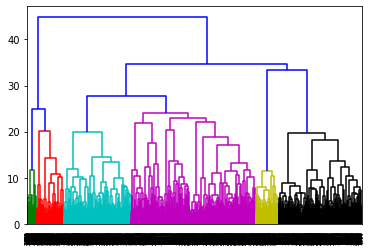

In [34]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'),color_threshold=25)
# plt.figure(figsize=(400, 100))

# plt.show()


In [35]:
print(dendrogram['color_list'])

['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',

In [69]:
clist=np.unique(den['color_list'])
from collections import defaultdict

clusterdict = defaultdict(list)
for ind,clust in zip(den['leaves'],den['color_list']):
    clusterdict[clust].append(ind)
clf=[]
for c in clist:
     clf.append(list(map(lambda x: map_d[x],clusterdict[c])))
    

In [70]:
np.random.randint(1, 50, 2)

array([23,  1])

In [71]:
clist

array(['#4e7ca1', '#5e9d5c', '#8d5d94', '#c13d3f', '#d27f2d', '#dbdb57',
       'b'], dtype='<U7')

In [72]:
np.asarray(clf[0])[np.random.randint(1, len(clf[0]), 20)].tolist() #refrence to accordance

['required, pursuant to the terms',
 'to the Obligor pursuant to',
 'such securities pursuant to Paragraph',
 'in Paragraph 13 or',
 'the meaning specified in Paragraphs',
 'under Paragraphs 3(a) and',
 'Eligible Credit Support or Posted Credit Support pursuant',
 'to Paragraphs are to',
 'Paragraph 13(h), means: in',
 'or Posted Credit Support pursuant to',
 'Paragraph 8 will be',
 'and pursuant to the Expenses Section',
 'specified in Paragraph 6(d)',
 'or Posted Credit Support pursuant to',
 'specified in Paragraph 13,',
 'specified in Paragraph 13',
 'in Paragraph 13 ( the "Substitution Date")',
 'of Paragraph 6(e), following',
 'demand and pursuant to',
 'the procedures specified in Paragraph']

In [73]:
np.asarray(clf[1])[np.random.randint(1, len(clf[1]), 20)].tolist() #dependant clause

['the Obligee will, not later',
 'will be deemed to',
 'that a Delivery Amount would not',
 'which may be retained',
 'no Interest Amount has yet been',
 'would not be created',
 'the “Exercising Party”) may exercise one',
 'which representations will be deemed',
 'that the parties have agreed',
 'the Obligor, the Obligee will, not',
 'all outstanding Transactions will be terminated',
 'to the same extent that the Obligee',
 'the Obligee will, or will',
 'such termination if the Exercising Party is',
 'and neither party will be',
 'interest ( including, without limitation,',
 'the relevant Transfer will be made',
 'to the extent that a Delivery Amount',
 'the extent possible, without any further action',
 'notify each party ( orthe other party, if']

In [74]:
np.asarray(clf[2])[np.random.randint(1, len(clf[2]), 20)].tolist() #equivalence clause

['be calculated on the basis',
 'this Annex as being specified',
 'Transfers to the Obligee hereunder,',
 'the aggregate sum of the Base Currency Equivalents of',
 'mortgage, encumbrance or other security interest',
 'of an Event of Default',
 'Equivalent Collateral, Distributions, and all proceeds',
 'the Obligee may repay the',
 'Collateral through one or more public or private sales or',
 'if they fail to',
 'with respect to any Obligations',
 'an Eligible Currency, the rate specified',
 'For this purpose, Transfer of',
 'or a resolution after consultation',
 'to the Obligee, then the Obligee',
 'over any Posted Pledging',
 'required of it under',
 'or Specified Condition with respect',
 'the Obligee, the right to withdraw',
 'relation to a transfer of']

In [75]:
np.asarray(clf[3])[np.random.randint(1, len(clf[3]), 40)].tolist() #Numeral citations

['Paragraph 3(b), 4(d)(ii) or',
 '(i), ( iii), ( iv) and (',
 'the period from ( and including)',
 '6(a) or 6(d), except',
 'and ( 4) if they',
 'in Paragraphs 7(i) and',
 '5 and 6(e) and',
 'the dispute and ( 4) if',
 'of (I) above or',
 'above, ( 3) the parties will',
 'the period from ( and including)',
 'and 5 and of',
 '4(d)(ii), 5, 6(e) and',
 'in Paragraphs 10(b) and',
 'above or (Y) the date',
 'is continuing or ( 2)',
 'resolve the dispute and ( 4)',
 'the case of (I) above',
 '3, 5 and 6(e)',
 'from ( and including) the date',
 'of (I) above or',
 'in Paragraphs 6(c)(i) and',
 'Paragraphs 4(a) and 5',
 'Paragraphs 3, 5 and',
 'i) or ( ii) above.',
 'Paragraphs 3, 4(d)(ii), 5,',
 "I) the Valuation Agent's calculation of a Delivery Amount",
 '13 and subjectto Paragraph 4(a),',
 '5 and 6(e) and',
 'Paragraphs 3(a) and 5',
 'from ( and including) the date',
 'Paragraphs 3, 4(d)(ii), 5,',
 '4(d)(ii) or 6(e)(A) or',
 '12 ( Notices) of the Agreement,',
 'to Paragraphs 6(a) and',
 'P

In [76]:
np.asarray(clf[4])[np.random.randint(1, len(clf[4]), 40)].tolist() #'By Statements(plain or action)'

['made by either party, will',
 'the bid price quotation obtained by the Valuation Agent',
 'the Expenses Section of the Agreement, by',
 'compliance by the Obligor with',
 'of any amounts payable by',
 'by the Interest Rate in effect',
 'specified by the Obligor in',
 'any sale of that Posted Collateral by',
 'payable by the Obligor with',
 'received by the Obligee under',
 'possible, without any further action by',
 'equal the amount by which:',
 'be retained by the Obligee)',
 'by the Valuation Agent or a resolution',
 'specified by the Obligor in',
 'on the exchange multiplied by',
 'the Obligee on that day, determined',
 'payable by the Obligor with',
 'one or more bank accounts specified by the recipient',
 'specified by the recipient, subsequently',
 'of Posted Pledging Collateral by a Custodian',
 'action by the parties, all amounts',
 'delivered by registration, the giving',
 'by that party to create,',
 'be determined by the Valuation Agent',
 'of any amounts payable by',
 'b

In [77]:
np.asarray(clf[5])[np.random.randint(1, len(clf[5]), 40)].tolist() #Random

['up to the Value of',
 'to result in a legally valid loan,',
 'Set-off as set forth',
 'or in the case of',
 'is of a type customarily',
 'gives the notices and takes',
 'prevail, and in the event',
 'will constitute Posted Lending Collateral in',
 'or the Obligor in connection',
 'the recipient in the case of',
 'Posted Collateral that consists of',
 "the Valuation Agent's calculation of a Delivery Amount or",
 'of the Obligee or the Obligor',
 'grants to the Obligee right of',
 'of the Deposit Account, as the case',
 "from the exercise of the Obligee's rights",
 'the recipient in the case of',
 'or grant a security interest in,',
 'in the form of cash (',
 'on which the clearance system agreed',
 'elsewhere in the Agreement have',
 'written or electronic demands for the registration to',
 'will prevail, and in',
 'be a Valuation Date for this purpose).',
 'assignments in blank, transfer',
 'including dealings in foreign exchange',
 'a type customarily sold on',
 'of any inconsistenc

In [78]:
np.asarray(clf[6])[np.random.randint(1, len(clf[6]), 40)].tolist() #refrence to accordance

['in, and the rights',
 'that failure continues for three Local Business Days',
 'in, and the rights',
 'that failure continues for three Local Business Days',
 'in, and the rights',
 'and that failure continues for',
 'in, and the rights',
 'in, and the rights',
 'and that failure continues for',
 'in, and the rights',
 'that failure continues for 30 days',
 'and that failure continues for',
 'that failure continues for three Local Business Days',
 'that failure continues for three Local Business Days',
 'that failure continues for three Local Business Days',
 'that failure continues for 30 days',
 'that failure continues for three Local Business Days',
 'that failure continues for three Local Business Days',
 'that failure continues for 30 days',
 'in, and the rights',
 'and that failure continues for',
 'that failure continues for 30 days',
 'that failure continues for three Local Business Days',
 'and that failure continues for',
 'that failure continues for 30 days',
 'that failur

In [79]:
clf[6]#Random

['of this Paragraph 3(b),',
 'in, and the rights',
 'and that failure continues for',
 'that failure continues for 30 days',
 'that failure continues for three Local Business Days']

In [47]:
DF=pd.DataFrame(clf)
dft=DF.T
dft.head()

,0,1,2,3,4,5,6
0,"of this Paragraph 3(b),",of this Paragraph 8(a),above or (Y) the date,"by (z) 365 ""Interest Period"" means the period",zero whenever the calculation of,"Paragraphs 10(b) and 10(c),",and the rights which
1,"in, and the rights",be deemed to continue,above or (Y) the date,"(z) 365 ""Interest Period"" means the period from (",whenever the calculation of the Credit Support...,Transfer pursuant to Paragraph,the rights which a pledgee
2,and that failure continues for,be deemed to continue,(I) above or (Y),means the period from ( and,"of Default or a Specified Condition,",Transferred pursuant to this Paragraph,by the Obligor with Paragraph
3,that failure continues for 30 days,deemed to continue to,(I) above or (Y),that consists of items,of Default or Specified Condition,Transferred pursuant to Paragraph,by it under Paragraph
4,that failure continues for three Local Busines...,deemed to continue to,to ( 3) above and,consists of items that,of Default or Specified Condition,determined pursuant to Section,by the Obligee under Paragraph


In [48]:
dft.isnull().sum()

0    1611
1     748
2    1487
3     540
4       0
5    1264
6    1325
dtype: int64

In [49]:
print(len(clf[0]),'\n',clf[0])

5 
 ['of this Paragraph 3(b),', 'in, and the rights', 'and that failure continues for', 'that failure continues for 30 days', 'that failure continues for three Local Business Days']


In [50]:
print(len(clf[1]),'\n',clf[1]) #d

868 
 ['of this Paragraph 8(a)', 'be deemed to continue', 'be deemed to continue', 'deemed to continue to', 'deemed to continue to', 'or deemed to have', 'deemed to have been', 'be deemed to have', 'deemed to be zero', 'is deemed to hold', 'deemed to be a Valuation Date', 'deemed to be a Valuation Date', 'deemed to be a return', 'deemed to be the holding', 'deemed to be Set-off', 'a Custodian will be deemed', 'which representations will be deemed', 'the Credit Support Amount will be deemed', 'the Obligee, will be deemed', 'the Obligee, will be deemed', 'the date ofcalculation will be deemed', 'the Obligee will be deemed', 'the Obligee will be deemed', 'be deemed to be', 'be deemed to be', 'be deemed to be', 'be deemed to be', 'be deemed to be', 'be deemed to be', 'be deemed to be', 'will be deemed to', 'will be deemed to', 'will be deemed to', 'will be deemed to', 'will be deemed to', 'will be deemed to', 'will be deemed to', 'will be deemed to', 'will be deemed to', 'certificated secu

In [51]:
clf[2]

['above or (Y) the date',
 'above or (Y) the date',
 '(I) above or (Y)',
 '(I) above or (Y)',
 'to ( 3) above and',
 'above, ( 2) subject to',
 '3) above and subject',
 '6(d)(i) above) over any',
 'above) over any Posted',
 'following ( X) the date',
 'X) the date that',
 'on the third Local Business Day following ( X)',
 'the third Local Business Day following ( X) the',
 'the case of (I) above',
 'the case of (I) above',
 'of (I) above or',
 'of (I) above or',
 'or (Y) the date of',
 'or (Y) the date of',
 "disputes ( I) the Valuation Agent's calculation of",
 "I) the Valuation Agent's calculation of a Delivery Amount",
 '12 ( Notices) of the Agreement,',
 'the purposes of (i), ( iii), (',
 'the case of (II) above, (',
 'the case of (II) above, (',
 'Transferred, from ( and including)',
 'the period from ( and including)',
 'from ( and including) the date',
 'from ( and including) the last Local Business Day',
 'and 7(ii) and that failure',
 'and 6(e) and any',
 'and 6(e) and any',
 

In [52]:
clf[3]

['by (z) 365 "Interest Period" means the period',
 '(z) 365 "Interest Period" means the period from (',
 'means the period from ( and',
 'that consists of items',
 'consists of items that',
 'of items that are',
 'items that are not',
 'to have all of',
 'have all of the incidents',
 'mid-market of the amounts that',
 'be the holding of that',
 'of the amounts that would',
 'of any nature that are',
 'all of its Obligations that',
 'of its Obligations that are',
 'of cash ( all of',
 'the form of cash ( all',
 'cash ( all of which',
 'full all of its Obligations',
 'in full all of',
 'in full of all amounts',
 'where such Posted Credit Support consists of',
 'where such Posted Lending Collateral consists of',
 'that where such Posted Credit Support consists',
 'that, where such Posted Lending Collateral consists',
 'such Posted Lending Collateral consists of securities,',
 'consists of securities, the Obligee',
 'consists of Posted Lending Collateral in',
 'such Posted Credit Support c

In [53]:
clf[4]

['zero whenever the calculation of',
 'whenever the calculation of the Credit Support Amount',
 'of Default or a Specified Condition,',
 'of Default or Specified Condition',
 'of Default or Specified Condition',
 'of Default or Specified Condition',
 'of Default or Specified Condition',
 'of Default or Specified Condition',
 'Default or Specified Condition with',
 'Default or Specified Condition with',
 'Default or Specified Condition with',
 'Default or Specified Condition with',
 'Default or a Specified Condition, subject',
 'Default or Specified Condition has',
 'of Default will exist',
 'Default will exist with',
 'Potential Event of Default or',
 'an Event of Default or',
 'an Event of Default or',
 'an Event of Default or',
 'an Event of Default or',
 'any time, (1) an Event of Default',
 '(1) an Event of Default or',
 'Events of Default For',
 'no Event of Default, Potential Event',
 'of Default, Potential Event of',
 'of an Event of Default',
 'of an Event of Default',
 'of an 

In [54]:
clf[4]

['zero whenever the calculation of',
 'whenever the calculation of the Credit Support Amount',
 'of Default or a Specified Condition,',
 'of Default or Specified Condition',
 'of Default or Specified Condition',
 'of Default or Specified Condition',
 'of Default or Specified Condition',
 'of Default or Specified Condition',
 'Default or Specified Condition with',
 'Default or Specified Condition with',
 'Default or Specified Condition with',
 'Default or Specified Condition with',
 'Default or a Specified Condition, subject',
 'Default or Specified Condition has',
 'of Default will exist',
 'Default will exist with',
 'Potential Event of Default or',
 'an Event of Default or',
 'an Event of Default or',
 'an Event of Default or',
 'an Event of Default or',
 'any time, (1) an Event of Default',
 '(1) an Event of Default or',
 'Events of Default For',
 'no Event of Default, Potential Event',
 'of Default, Potential Event of',
 'of an Event of Default',
 'of an Event of Default',
 'of an 

In [55]:
clf[5]

['Paragraphs 10(b) and 10(c),',
 'Transfer pursuant to Paragraph',
 'Transferred pursuant to this Paragraph',
 'Transferred pursuant to Paragraph',
 'determined pursuant to Section',
 'determined pursuant to Paragraph',
 'payable pursuant to Paragraph',
 'specified pursuant to Paragraph',
 'the Obligor pursuant to Paragraph',
 'the Obligor pursuant to Paragraph',
 'any Posted Lending Collateral pursuant to Paragraph',
 'such securities pursuant to Paragraph',
 'pursuant to Paragraph 12,',
 'pursuant to Paragraph 13.',
 'pursuant to Paragraph 13)',
 'pursuant to Paragraph 10 (c))',
 'pursuant to Paragraph 3(b),',
 'pursuant to Paragraph 3(b),',
 'pursuant to Paragraph 6(a).',
 'pursuant to Paragraph 2(a)',
 'pursuant to Paragraph 6(e)(B)',
 'Distributions pursuant to Paragraphs',
 'pursuant to Paragraphs 6(a)',
 'pursuant to Paragraphs 6(a)',
 'pursuant to Paragraphs 3,',
 'pursuant to Paragraphs 3,',
 'receive pursuant to Paragraphs',
 'Posted Credit Support pursuant to Paragraphs',
 '

# Another try


In [56]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/raunaka/PycharmProjects/exp/venv/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [57]:
from collections import defaultdict

import pandas as pd
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette
from fastcluster import linkage
import seaborn as sns
from matplotlib.colors import rgb2hex, colorConverter

In [58]:
sns.set_palette('Set1', 10, 0.65)
palette = sns.color_palette()
set_link_color_palette(list(map(rgb2hex, palette)))
sns.set_style('white')

In [59]:
v_array=np.asarray(vect)
a=v_array.shape[0]
b=v_array.shape[1]

In [60]:
df1 = pd.DataFrame(v_array,
                  index=['sample_{}'.format(i) for i in range(1, a + 1)],
                  columns=['gene_{}'.format(i) for i in range(1, b + 1)])

In [61]:
link=linkage(df1,method='ward')

In [62]:
figsize(80, 300)

den = sch.dendrogram(link, labels=df.index,color_threshold=25)
plt.xticks(rotation=90)
no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
sns.despine(**no_spine);

plt.tight_layout()
plt.savefig('tree1.png');

In [63]:
den.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])

In [64]:
np.unique(den['color_list'])

array(['#4e7ca1', '#5e9d5c', '#8d5d94', '#c13d3f', '#d27f2d', '#dbdb57',
       'b'], dtype='<U7')

In [65]:
len(den['leaves'])

4338

In [66]:
z=nlp('paragraph 5')
for token in z:
    span=z[token.i:token.i+1]
    print(span)

paragraph
5


In [67]:
X=np.random.rand(15,15)
X

array([[0.46494938, 0.65516929, 0.85174168, 0.51183248, 0.99667193,
        0.6921954 , 0.31141268, 0.48110348, 0.75755431, 0.46022613,
        0.97010635, 0.98307236, 0.32206275, 0.17135508, 0.25896689],
       [0.18900654, 0.92503475, 0.17936374, 0.84025145, 0.80863205,
        0.97133294, 0.59395197, 0.89913391, 0.82301843, 0.40183434,
        0.60980677, 0.40020833, 0.80868844, 0.87659859, 0.89006479],
       [0.71782453, 0.05698842, 0.132279  , 0.78158337, 0.78386931,
        0.39283011, 0.54580703, 0.29165991, 0.27715121, 0.86291755,
        0.19121197, 0.98520518, 0.0719409 , 0.19732597, 0.05194684],
       [0.38952086, 0.72374155, 0.15980821, 0.31032178, 0.93887728,
        0.88790742, 0.52838786, 0.61837699, 0.8272584 , 0.88384361,
        0.26988046, 0.66803517, 0.56597278, 0.76768181, 0.72030368],
       [0.52998362, 0.18023732, 0.51929753, 0.34691965, 0.68211829,
        0.40253941, 0.20956416, 0.96896246, 0.71635965, 0.48870321,
        0.89343594, 0.11201531, 0.25496874, 

In [68]:
import plotly.plotly as py
import plotly.figure_factory as ff

dendro = ff.create_dendrogram(x, color_threshold=1.5)
dendro['layout'].update({'width':800, 'height':500})
py.iplot(dendro)

KeyError: '#c13d3f'

In [ ]:
c=sum(vec[0])